
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

Autores:



*   Diego A. Gómez
*   Natalia A. kunzmann
*   Natalia C. Graselli
*   Patricia V. Gonzalez
*   M. Virginia Romero Messein

# Ejecicio 3: Estadísticos y Test de Hipótesis

**Consigna:**  

1.   Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para hombres y la media del salario Neto para otros géneros(diferencia de las medias entre el grupo A y grupo B). 

2.  ¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

3.  Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

4. Calcule el p-valor y decida si rechazar o no la hipótesis nula. Interprete el resultado.

## Lectura del dataset

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import scipy


seaborn.set_context('talk')

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


## Estimación de parámetros poblacionales

Como ya sabemos, los datos recolectados por la encuesta representan una muestra de la población total de los trabajadores/as del rubro IT, y no al universo completo de los mismos. 

Las medidas resumen de una población, en este caso el universo completo de trabajadores y trabajadoras del rubro IT, se denominan **parámetros** y nos permiten conocer una cualidad particular de la población completa. Cuando no podemos acceder a los datos completos de la población (como es este caso) y únicamente a una muestra de la misma, las medidas resumen de la misma se denominan estadísticos. 

Un **estadístico** es entonces una variable aleatoria que depende de la muesta y nos permite inferir el valor de un parámetro poblacional. Generalmente, uno puede usar los estadisticos para hacer dos tipos de estimaciones: una estimación puntual o una estimación por intervalos. 

En este caso, estamos interesados en estimar la diferencia entre la media salarial de los hombres y la media salarial de los otros géneros. 


Iniciamos el ejericio trabajando con el dataset crudo, sin filtrar, y observamos como se comporta el salario neto mensual de los programadores en relación al género del trabajador/a. 

In [ ]:
#Usamos la función describe para obtener la media, mediana, desviación estadar y otras medidas estadisticas referidas al salario neto

df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe().round(2)

salary_monthly_NETO                                      \
                             count      mean        std   min      25%   
profile_gender                                                           
Hombre                      4944.0  98836.06  102159.66   1.0  53285.0   
Mujer                        908.0  73501.41   56256.88   2.0  43818.0   
Otros                         31.0  95441.35   88635.67  40.0  39500.0   

                                              
                    50%       75%        max  
profile_gender                                
Hombre          80000.0  110000.0  2080000.0  
Mujer           65000.0   92000.0   800000.0  
Otros           74000.0  117500.0   380000.0

Observamos que el dataset contiene respuestas con salarios indicados de valores muy bajos (que probablemente son erroneos) que pueden afectar el valor de la media muestral. Es por ello, que vamos a trabajar solo con las respuestas donde el salario es mayor a 1000. 

In [ ]:
#Repetimos, pero esta vez filtrando del análisis los salarios menores a mil pesos

df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe().round(2)

salary_monthly_NETO                                          \
                             count       mean        std      min      25%   
profile_gender                                                               
Hombre                      4815.0  101481.62  102215.30   1100.0  55000.0   
Mujer                        863.0   77328.91   55082.76   2000.0  47850.0   
Otros                         28.0  105660.71   87235.71  34000.0  43750.0   

                                              
                    50%       75%        max  
profile_gender                                
Hombre          80000.0  110000.0  2080000.0  
Mujer           67200.0   93000.0   800000.0  
Otros           78900.0  122750.0   380000.0

In [ ]:
#Vamos a diferenciar los datos en base a dos grupos: aquellos provenientes de hombres y aquellos que provienen a otros géneros (no son hombres)

is_man = df.profile_gender == 'Hombre' #Establecemos la condición

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO #Separamos el grupo A (Hombres)
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO #Separamos el grupo B (No hombres)


In [ ]:
#Contamos la cantidad de instancias que posee cada grupo.

nA = groupA.count()
nB = groupB.count()
print("De la muestra tomada, {} son hombres y {} no lo son.".format(nA, nB)) # Observamos que se cuenta con muchos más datos de hombres que de otros géneros

De la muestra tomada, 4815 son hombres y 891 no lo son.


En función de los grupos definidos, queremos calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para diferencia de las medias entre el grupo A y grupo B

## Estimación puntual



La **estimación puntual**, calcula un unico valor que se utiliza para estimar el parametro poblacional. 

Para calcular la estimación puntual de la diferencia de medias entre dos poblaciones, debemos calcular la estimación puntual de las medias de cada uno de los grupos y restarlas. 

In [ ]:
#Calculamos la estimación puntual de la media para cada grupo

media_groupA = groupA.mean() #Media muestral grupo A
media_groupB = groupB.mean() #Media muestral grupo B

round(media_groupA, 2), round(media_groupB, 2)

print("Media Grupo A: {}, Media Grupo B: {}".format(round(media_groupA, 2), round(media_groupB, 2)))

Media Grupo A: 101481.62, Media Grupo B: 78219.25


In [ ]:
#La estimación puntual para la diferencia de medias del grupo A y B esta dada entonces por

dif_medias= media_groupA - media_groupB #Restamos las variables calculadas anteriormente

print('La estimación puntual de la diferencia entre la media salarial de los hombres y la media salarial de los otros géneros es:', round(dif_medias, 2))

La estimación puntual de la diferencia entre la media salarial de los hombres y la media salarial de los otros generos es: 23262.37


## Estimación por intervalos

Otra forma de estimar un parametro poblacional en base a un estadístico, es definir un intervalo de confianza; es decir un intervalo que, con un cierto grado de confianza, se estima que va a contener al parametro poblacional. 

El primer paso para definir el intervalo es definir el grado de confianza con el que vamos a trabajar (1-𝜶). En este caso, elegimos trabajar con un nivel de confianza de 0.95. Esto significa que existe una probabilidad del 95% que el verdadero parámetro se encuentre en el intervalo propuesto.

In [ ]:
#Definimos el alpha como 0.05
alpha = 0.05

El siguiente paso consiste en calcular los limites inferiores y superiores del intervalo. Para ello, aplicamos la siguiente formula:

Nati G: Cambiar este dibujito, no usamos la varianza poblacional sino la muestral por ser sigma desconocida y n mayor a 30

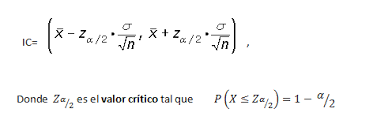

In [ ]:
#Calculamos la desviación estandar de cada grupo

desv_groupA = groupA.std() #Desviación estandar grupo A
desv_groupB = groupB.std() #Desviación estandar grupo B

print("Desviación estándar Grupo A: {}, Desviación estándar Grupo B: {}".format(round(desv_groupA, 2), round(desv_groupB, 2)))

Desviación estándar Grupo A: 102215.3, Desviación estándar Grupo B: 56515.33


In [ ]:
#Calculamos la varianza de cada grupo

var_groupA = desv_groupA ** 2 #Varianza grupo A
var_groupB = desv_groupB ** 2 #Varianza grupo B

print("Varianza Grupo A: {}, Varianza Grupo B: {}".format(round(var_groupA, 2), round(var_groupB, 2)))

Varianza Grupo A: 10447968511.73, Varianza Grupo B: 3193982222.48


In [ ]:
#Definimos la variable que representa el valor critico Z_(1-alpha/2) = Z_0.975

z_0975 = 1.96

In [ ]:
#Calculamos la varianza y la desviación estandar de la diferencia entre los dos grupos

arr = [(var_groupA/nA) + (var_groupB/nB)] #Calculamos la varianza
arr_sqrt = np.sqrt(arr) #Tomamos raiz cuadrada para obtener la desviación estandar

arr_sqrt

array([2398.87380516])

In [ ]:
#Calculamos los limites:

dif_medias_limsup= dif_medias + z_0975 * arr_sqrt #Limite superior
dif_medias_liminf= (dif_medias) - z_0975 * arr_sqrt #Limite inferior

print("El intervalo de confianza es: [", round(float(dif_medias_liminf), 2),",", round(float(dif_medias_limsup), 2), "]")

el intervalo de confianza es: [ 18560.58 , 27964.17 ]


In [ ]:
#Calculamos el rango del intervalo

range = dif_medias_limsup - dif_medias_liminf

print('El tamaño del intervalo es', round(float(range), 2))

El tamaño del intervalo es 9403.59


Así, podemos concluir, con un 95% de confianza, que la diferencia entre el salario promedio de los hombres y el salario promedio de los otros generos se ubicará entre los 18560,58 pesos y los 27964,17 pesos. 


## Formalización del test de Hipótesis

Buscamos aplicar un test de hipótesis para determinar si la distribución de los salarios es distinta entre los grupos A y B

**Hipótesis Nula**

El primer paso del test de hipótesis es definir las hipótesis del mismo. La hipótesis nula es aquella que mantendremos a menos que los datos indiquen lo contrario (es decir, la misma no se acepta, sino que se rechaza o no se rechaza). En este caso, nuestra hipÓtesis nula sería que la distribución de los salarios es la misma entre los grupos A y B. 

Así, definimos $H_0$, la hipotesis nula, como:

$H_0:$   (las medias del grupo A y B son iguales)

      μA = μB

La hipótesis alternativa, $H_1$, queda definida entonces como:

$H_1:$   (las medias del grupo a y el grupo B son diferentes)

      μA ≠ μB

Observamos que nuestra hipótesis nula se cumple si y solo si μA - μB = 0. Así, podemos redefinir la hipótesis nula para que sea más facil trabajar. Tendremos que: 

$H'0:$ (la diferencia de las medias de cada grupo es nula)

      μ = μA-μB=0  

La hipotesis alternativa, H1, queda definida entonces como:

$H'1:$ (la diferencia de las medias de cada grupo no es nula)

      μ = μA -μB > 0, o
      μ = μA -μB < 0 

**Nivel de Significancia**

El nivel de significancia, 𝜶, refiere al nivel de probabilidad de que ocurra un error del tipo 1 (es decir, que rechacemos la hipótesis y que en realidad esta sea verdadera) que estamos dispuestos a aceptar.

Para este caso, definimos un nivel de significancia del 5%. Así, 

𝜶 = 0.05

**Estadístico (Pivote)**

A partir de una muestra de la población en estudio, se extrae un estadístico (esto es, un valor que es función de la muestra) cuya distribución de probabilidad esté relacionada con la hipótesis en estudio y sea conocida. Se toma entonces como región de rechazo al conjunto de valores que es más improbable bajo la hipótesis, esto es, el conjunto de valores para el que rechazaremos la hipótesis nula si el valor del estadístico observado entra dentro de él.

La probabilidad de que se obtenga un valor del estadístico que entre en la región de rechazo aun siendo cierta la hipótesis puede calcularse. De esta manera, se puede escoger dicha región de tal forma que la probabilidad de cometer este error sea suficientemente pequeña.

* Identificar el estadístico: 
  
El estadistico es la variable aleatoria que depende de la muestra y nos va a ayudar a estimar los parámetros que definimos en la hipótesis nula, y por lo tanto, determinar si esta se rechaza o no. 

Observamos que en este caso, tanto la media poblacional como la varianza son desconocidas. Sin embargo, como en ambos grupos estamos trabajando con muestras de tamaño mayor a 30, la misma se considera lo suficientemente grande y podemos suponer que la varianza muestral (S) es lo suficientemente próxima a la varianza poblacional. 

De esta manera, el estadístico queda configurado como: 

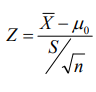

 * Qué distribución tiene bajo $H_0$:

Ahora, por Teorema Central del Límite, independientemente de la distribución de la población y de si la varianza poblacional es conocida o no, podemos asegurar que, como la muestra es lo suficientemente grande (n>30), bajo H0, el estadistico Z anteriormente definido tiene una distribución que se aproxima a la normal estándar.

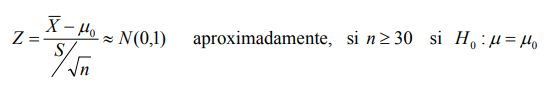


**Relación con el intervalo de confianza**

Dado el estadístico Z y el nivel de significancia 𝜶 , se obtiene la siguiente regla de decisión respecto a nuestra hipótesis nula:

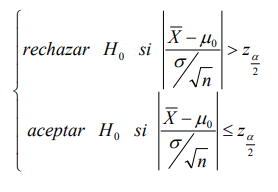

A partir de esto, podemos despejar el valor de la media muestral y obtenemos que la hipótesis no se rechaza si: 

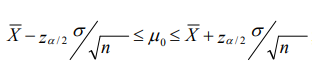

o lo que es equivalente, si: 

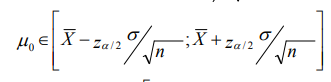

Pero entonces, podemos decir que la hipótesis no se rechaza si U0 queda contenida en el intervalo de confianza. 

En este caso, donde U0 = 0 y nuestro intervalo para una confianza del 95% era (18560, 27964), podemos rechazar con un 95% de seguridad nuestra hipótesis nula. Lo que significa que, con una certeza del 95%, podemos afirmar que la distribución del salario de los hombres y los otros géneros no es la misma. 

## P-valor



Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [ ]:
# Se utiliza la función de ttest de scipy para calcular p-valor, designando equal_var como False (ya que las varianzas de ambos grupos son distintas)
# para que realice test de Welch:
scipy.stats.ttest_ind(groupA, groupB, axis=0, equal_var=False)

Ttest_indResult(statistic=9.697205976350673, pvalue=8.605197322133209e-22)

Dado que el p obtenido es menor a 0,05 se rechaza la hipótesis nula por no haber evidencia estadística de que el salario mensual neto promedio de los hombres sea igual al resto de los géneros.